As per the Bureau of Transportation </b>

Carrier - The cause of the delay was due to circumstances within the airline's control (e.g. maintenance or crew problems, aircraft cleaning, baggage loading, fueling, etc.).</b>

Weather -  Significant meteorological conditions (actual or forecasted) that, in the judgment of the carrier, delays or prevents the operation of a flight such as tornado, blizzard or hurricane.</b>

NAS - (National Aviation System) Delays attributable to the national aviation system that refer to a broad set of conditions, such as non-extreme weather conditions, airport operations, heavy traffic volume, and air traffic control.</b>

Security - Delays caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.

Late-arriving - A previous flight with same aircraft arrived late, causing the present flight to depart late.

In [2]:
import pandas as pd
import numpy as np
import os
import math
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
cwd = os.getcwd()
fall = pd.read_csv(cwd +'/seasons/fall.csv')
spring = pd.read_csv(cwd +'/seasons/spring.csv')
summer = pd.read_csv(cwd +'/seasons/summer.csv')
winter = pd.read_csv(cwd +'/seasons/winter.csv')

In [4]:
delay = winter.append([spring,summer,fall])

In [5]:
delay_type = ['Carrier', 'Weather', 'NAS', 'Security', 'Late Aircraft']
delay_count = [sum(delay['CARRIER_DELAY'].fillna(0)), sum(delay['WEATHER_DELAY'].fillna(0)), \
               sum(delay['NAS_DELAY'].fillna(0)), sum(delay['SECURITY_DELAY'].fillna(0)),\
              sum(delay['LATE_AIRCRAFT_DELAY'].fillna(0))]

In [7]:
delay_count = [int(x) for x  in delay_count]

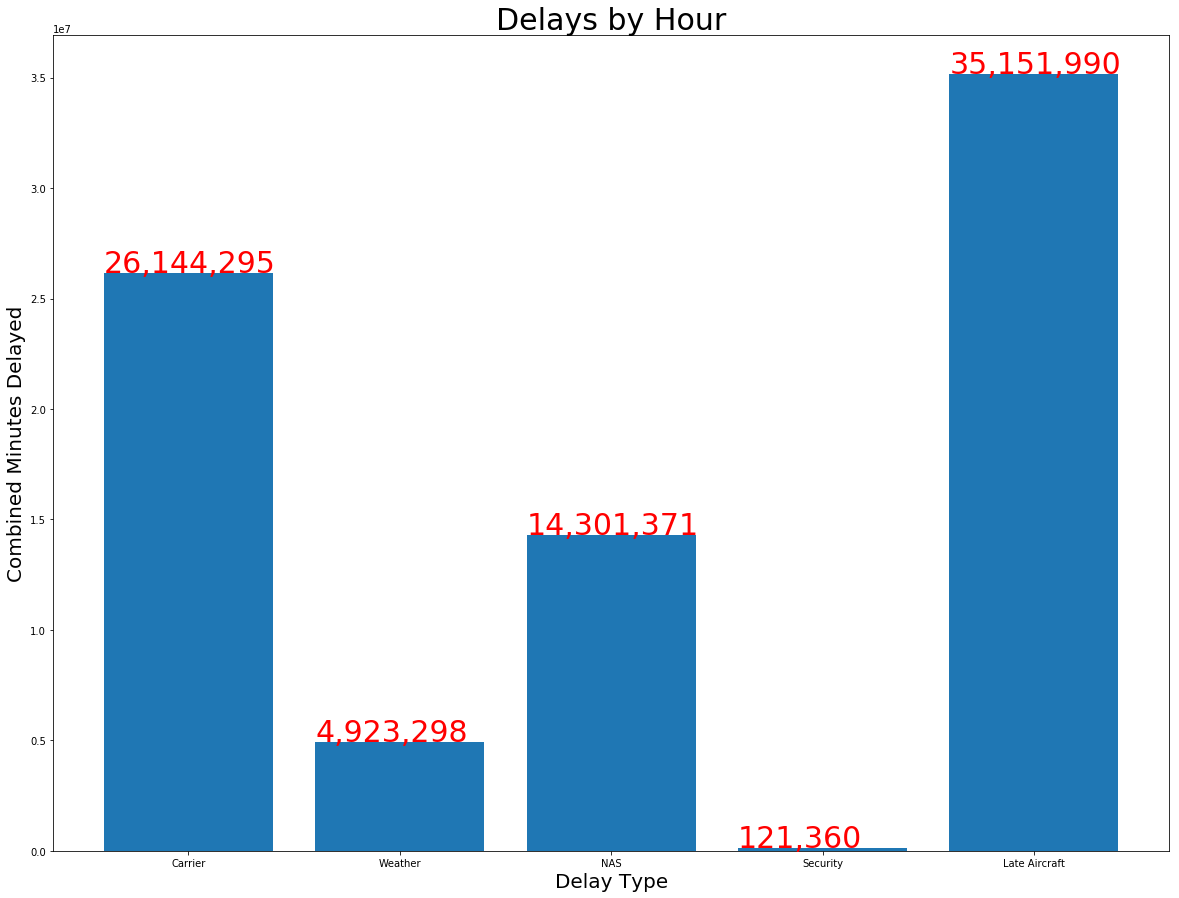

In [9]:
plt.figure(figsize=(20,15))
plt.bar(delay_type, delay_count)
plt.title("Delays by Hour", fontsize =30)
plt.xlabel('Delay Type', fontsize =20)
# plt.xticks([delay_type])
plt.ylabel('Combined Minutes Delayed', fontsize =20)
for a,b in zip(range(5), delay_count):
    plt.text(a - .4, b +50000, str("{:,}".format(int(b))), fontsize =30, color ='r')
plt.show()

In [10]:
# copy df to play with delay columns
type_freq = delay.copy()

In [11]:
# apply 1 if there was a delay and 0 if no delay so can count up frequency
d_type = ['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']
for d in d_type:
    type_freq[d] = type_freq[d].apply(lambda x: 1 if x > 0.0 else 0 )

In [12]:
freq_of_delay = [type_freq[d].sum() for d in d_type]

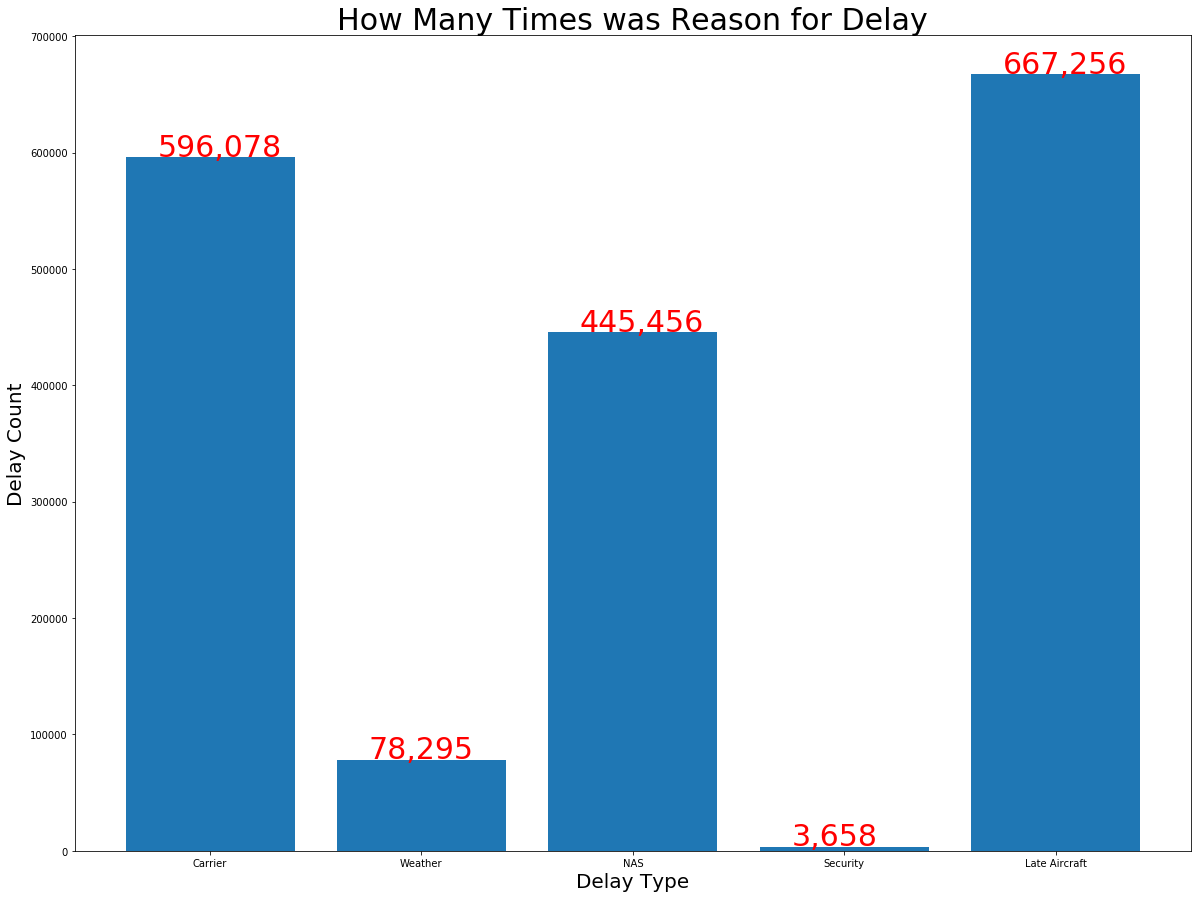

In [13]:
plt.figure(figsize=(20,15))
plt.bar(delay_type, freq_of_delay)
plt.title("How Many Times was Reason for Delay", fontsize =30)
plt.xlabel('Delay Type', fontsize =20)
# plt.xticks([delay_type])
plt.ylabel('Delay Count', fontsize =20)
for a,b in zip(range(5), freq_of_delay):
    plt.text(a - .25, b +1000, "{:,}".format(int(b)), fontsize =30, color ='r')
plt.show()

In [14]:
avg_delay = [round(delay_count[x]/freq_of_delay[x],0) for x in range(5)]

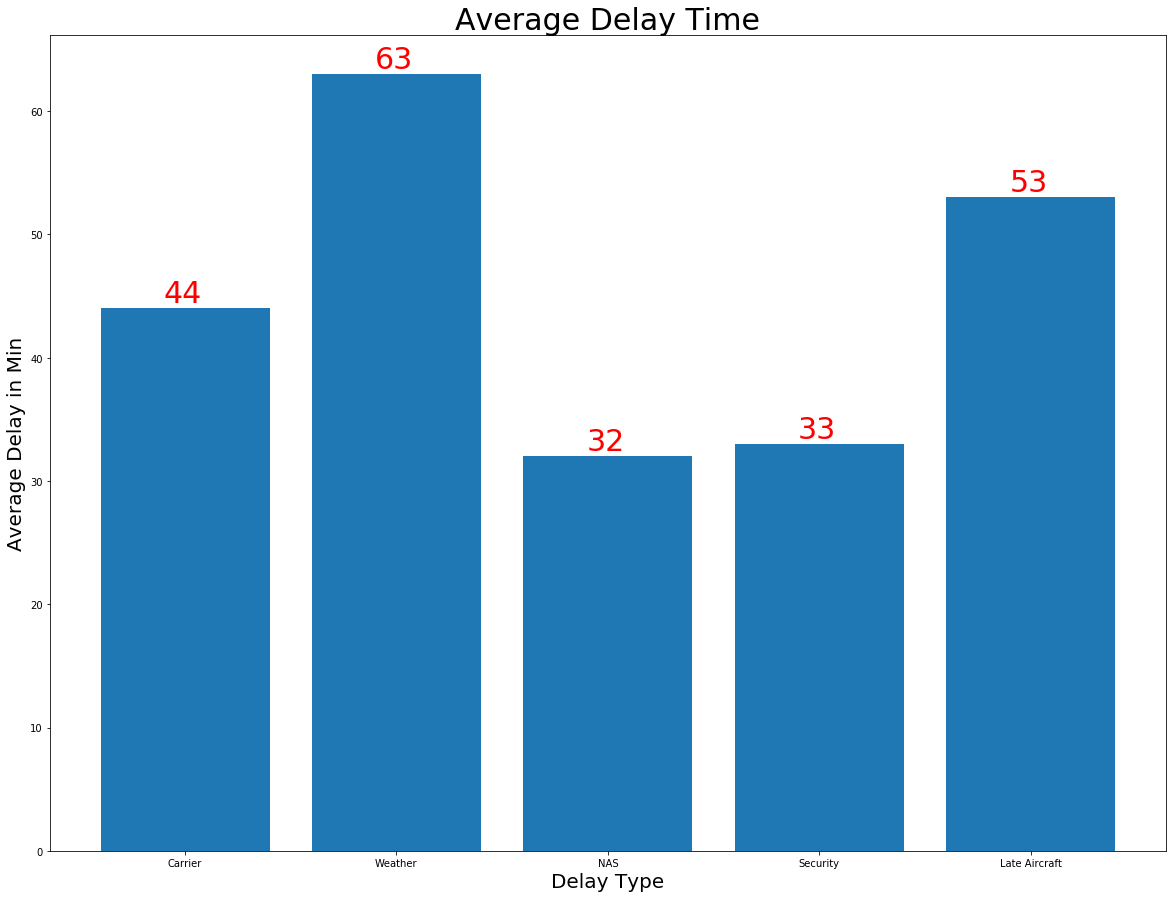

In [15]:
plt.figure(figsize=(20,15))
plt.bar(delay_type, avg_delay )
plt.title("Average Delay Time", fontsize =30)
plt.xlabel('Delay Type', fontsize =20)
# plt.xticks([delay_type])
plt.ylabel('Average Delay in Min', fontsize =20)
for a,b in zip(range(5), avg_delay):
    plt.text(a - .1, b + .5, str(int(b)), fontsize =30, color ='r')
plt.show()

## Carrier Delay

In [29]:
carrier = delay.loc[type_freq['CARRIER_DELAY'] > 0]

In [30]:
len(carrier)

596078

In [31]:
# find how which airline had the most carrier delays
car = sorted(list(set(carrier['OP_UNIQUE_CARRIER'])))
c_ct = carrier['OP_UNIQUE_CARRIER'].value_counts()
carry = [c_ct[x] for x in car]

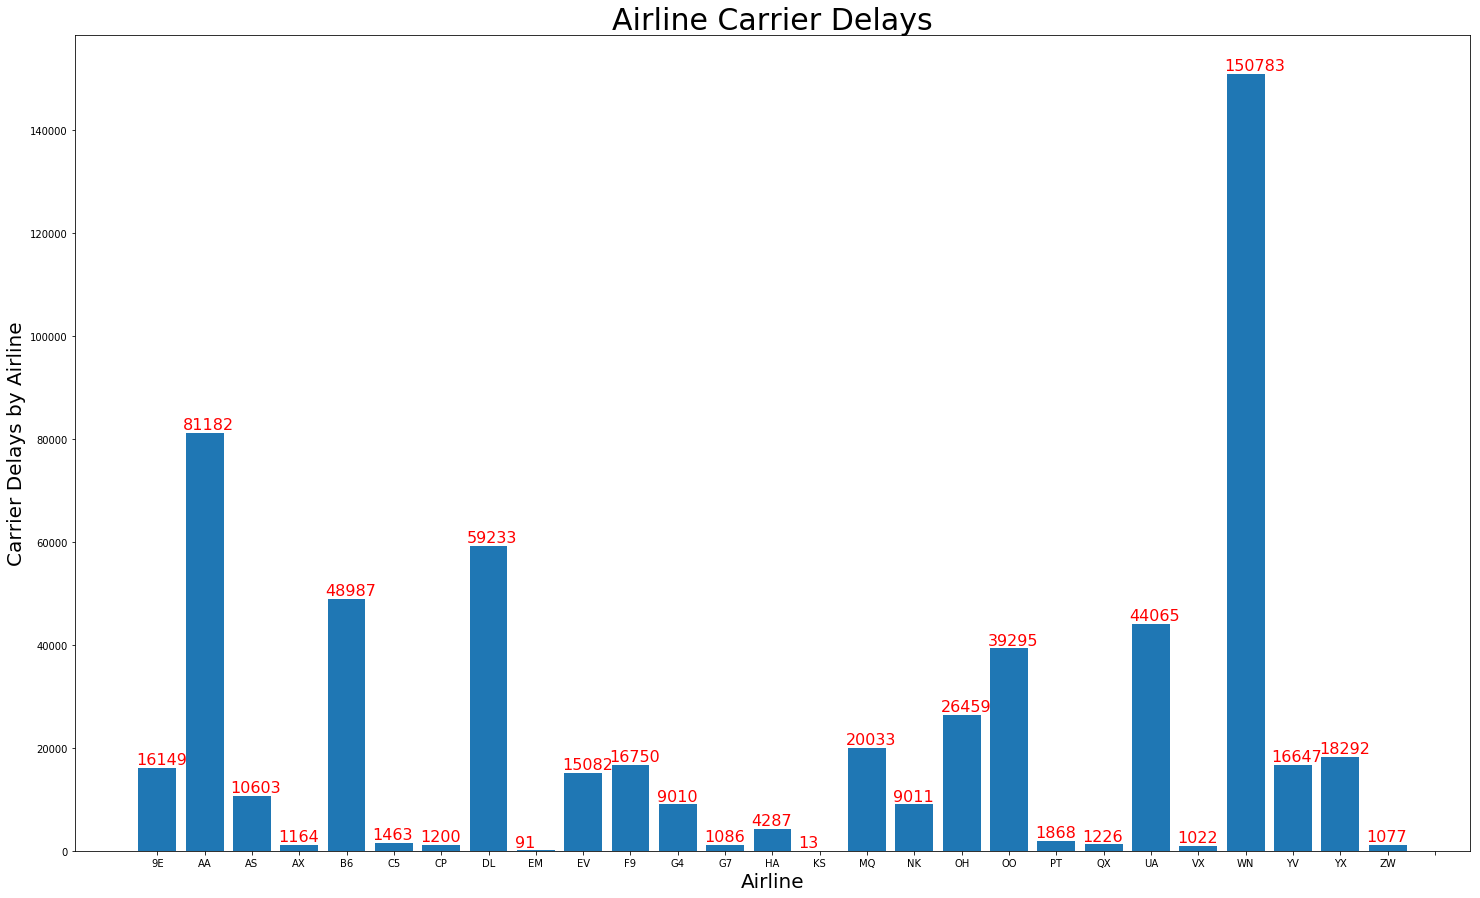

In [49]:
plt.figure(figsize=(25,15))
plt.bar(car, carry)
plt.title("Airline Carrier Delays", fontsize =30)
plt.xlabel("Airline", fontsize =20)
plt.xticks(range(28))
plt.ylabel("Carrier Delays by Airline", fontsize =20)
for a,b in zip(range(28), carry):
    plt.text(a - .45, b + 700, str(b), fontsize =16, color ='r')
plt.show()

In [ ]:
# figure out for each carrier, how long their total delays added up to
length_delays = []
for c in car:
    airl = carrier[carrier['OP_UNIQUE_CARRIER'] == c ]
    length_delays.append(sum(airl['CARRIER_DELAY']))

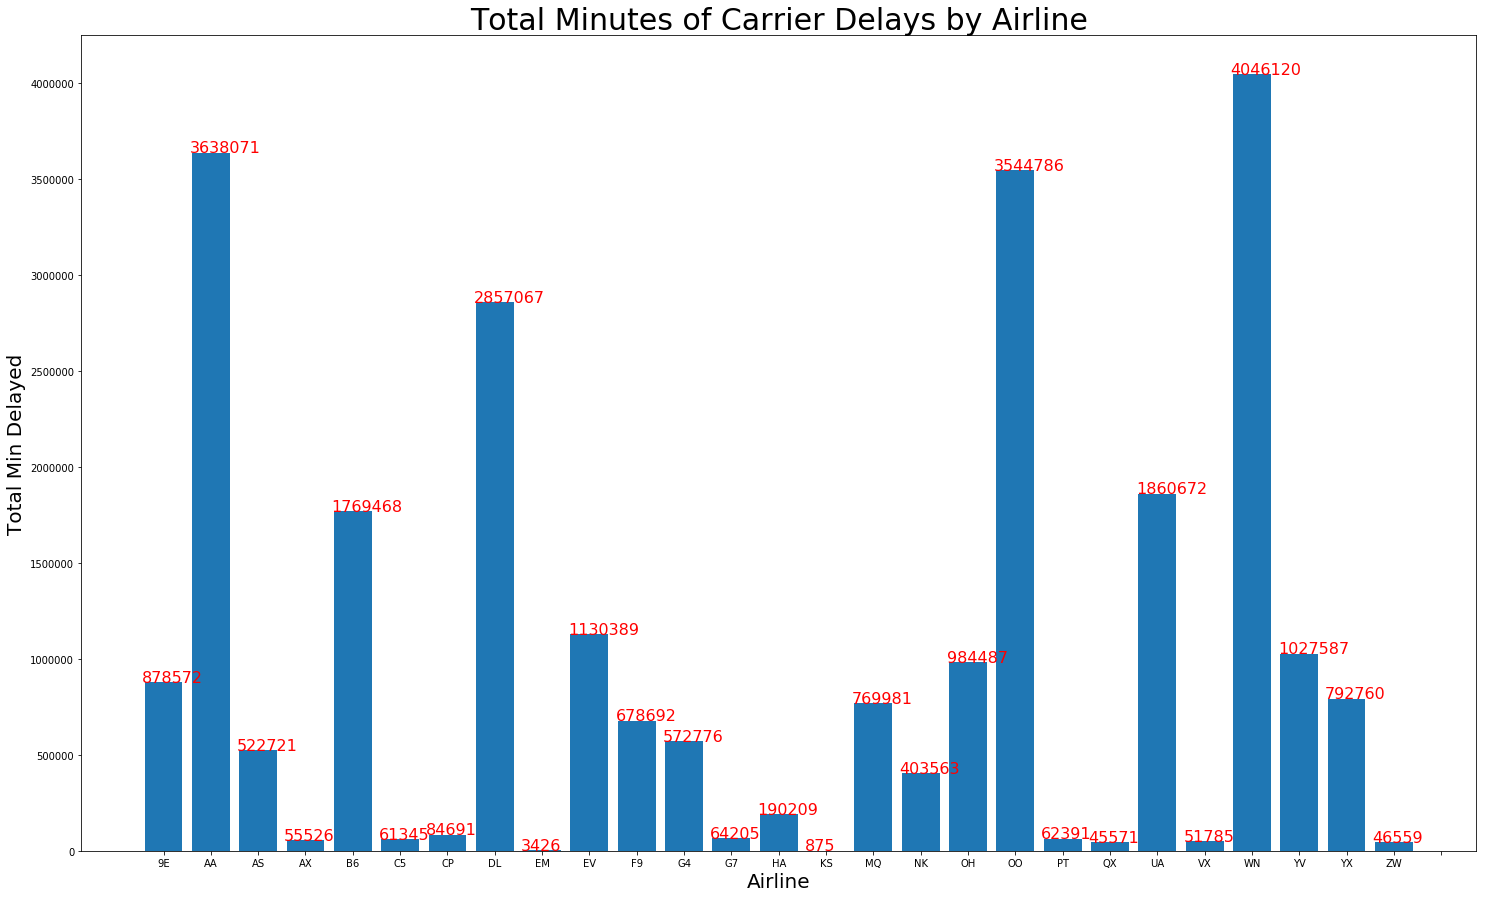

In [61]:
plt.figure(figsize=(25,15))
plt.bar(car, length_delays)
plt.title("Total Minutes of Carrier Delays by Airline", fontsize =30)
plt.xlabel("Airline", fontsize =20)
plt.xticks(range(28))
plt.ylabel("Total Min Delayed", fontsize =20)
for a,b in zip(range(28), length_delays):
    plt.text(a - .45, b + 700, str(int(b)), fontsize =16, color ='r')
plt.show()

In [57]:
avg_delay_line = [round(length_delays[x]/carry[x],0) for x in range(27)]

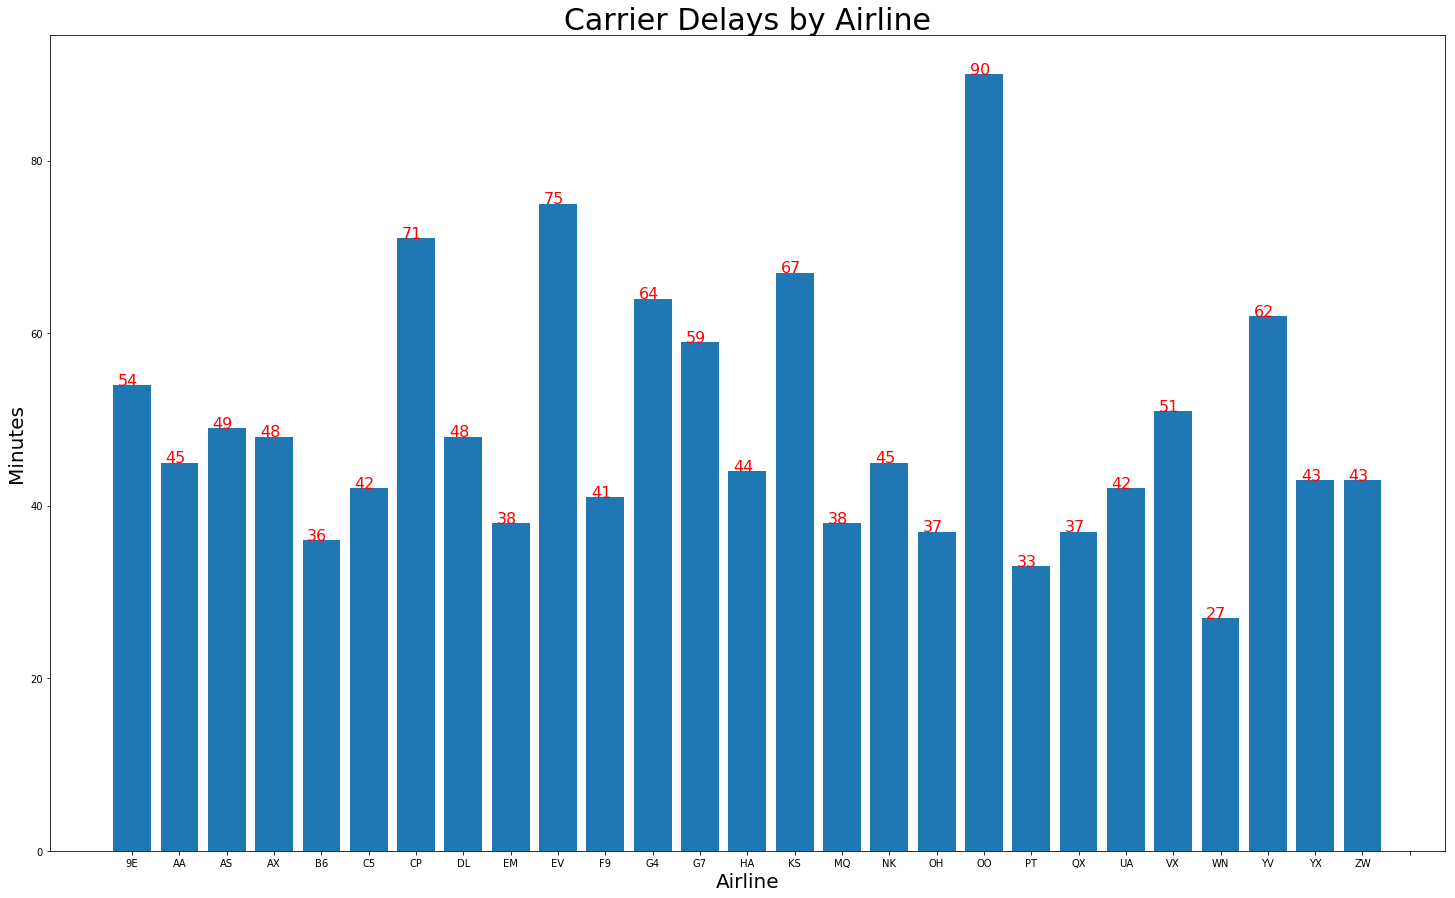

In [354]:
plt.figure(figsize=(25,15))
plt.bar(car, avg_delay_line)
plt.title("Carrier Delays by Airline", fontsize =30)
plt.xlabel("Airline", fontsize =20)
plt.xticks(range(28))
plt.ylabel("Minutes", fontsize =20)
for a,b in zip(range(28), avg_delay_line):
    plt.text(a - .3, b, str(int(b)), fontsize =16, color ='r')
plt.show()

In [75]:
# find how often airport has been used
city = carrier.reindex(columns= (['ORIGIN', 'DEST']))
cities = city.melt()['value'].value_counts()

In [86]:
used_city = cities.where(cities > 1000).dropna().index.tolist()

In [97]:
origins = carrier['ORIGIN'].unique()

In [89]:
# seeing which airlines have more delays with their staff at certain airports
# only origin since that is where carrier delay is, destination wouldn't cause it
airline_origin = carrier.groupby(['OP_UNIQUE_CARRIER','ORIGIN']).size()

In [106]:
# count of how many delays an airline had at specific airport
ao = []
for c in car:
    for o in origins:
        if (o in used_city) & (o in airline_origin[c]):
            if airline_origin[c][o] > 1000:
                            ao.append([airline_origin[c][o], c, o])
        

In [111]:
sorted(ao, reverse =True)[:10]

[[19798, 'AA', 'DFW'],
 [18971, 'DL', 'ATL'],
 [13082, 'WN', 'MDW'],
 [10772, 'OH', 'CLT'],
 [10093, 'WN', 'LAS'],
 [10040, 'WN', 'DAL'],
 [9888, 'AA', 'CLT'],
 [9231, 'B6', 'BOS'],
 [8300, 'WN', 'BWI'],
 [8053, 'AA', 'ORD']]

In [ ]:
# A lot of delays with delta/atlanta pairing and AMerican/Dallas fort worth paring

In [121]:
line_month = carrier.groupby(['OP_UNIQUE_CARRIER','MONTH']).size()

In [125]:
# count of how many delays an airline had at specific airport
am = []
for c in car:
    for m in range(1,13):
        if (m in line_month[c]):
            am.append([line_month[c][m], c, m])
        

In [134]:
sorted(am,  reverse= True)[:15]

[[16239, 'WN', 7],
 [15564, 'WN', 5],
 [14698, 'WN', 12],
 [14406, 'WN', 4],
 [14367, 'WN', 6],
 [13361, 'WN', 3],
 [12675, 'WN', 8],
 [11556, 'WN', 11],
 [11405, 'WN', 2],
 [10238, 'AA', 7],
 [9664, 'WN', 10],
 [9317, 'WN', 1],
 [9126, 'AA', 8],
 [8952, 'AA', 6],
 [7531, 'WN', 9]]

Beware SouthWest: No month is safe to avoid delays with the top 9 being SouthWest, As well as all 12 months being in the top 15 for most delays.(Although it is also the airline with the most flights

In [137]:
line_org_month = carrier.groupby(['OP_UNIQUE_CARRIER','MONTH', 'ORIGIN']).size()

In [146]:
# count of how many delays an airline had at specific airport and month
aom = []
for c in car:
    for m in range(1,13):
        if m in line_org_month[c]:
            for o in origins:
                if (o in used_city) & (o in line_org_month[c][m]):
                    if (line_org_month[c][m][o] > 1000):  
                        aom.append([line_org_month[c][m][o], c, o, m])

In [154]:
sorted(aom,  reverse= True)[:10]

[[2663, 'AA', 'DFW', 7],
 [2579, 'DL', 'ATL', 6],
 [2373, 'AA', 'DFW', 6],
 [2318, 'AA', 'DFW', 8],
 [2109, 'DL', 'ATL', 5],
 [2041, 'DL', 'ATL', 7],
 [1815, 'DL', 'ATL', 11],
 [1791, 'DL', 'ATL', 8],
 [1654, 'AA', 'DFW', 5],
 [1594, 'AA', 'DFW', 10]]

In [157]:
line_hour = carrier.groupby(['OP_UNIQUE_CARRIER','HOUR']).size()

In [164]:
# count of how many delays an airline has per hour
ah = []
for c in car:
    for h in range(24):
        if (h in line_hour[c]):
            ah.append([line_hour[c][h], c, h])

In [167]:
sorted(ah,  reverse= True)[:20]

[[15178, 'WN', 20],
 [14097, 'WN', 18],
 [13836, 'WN', 17],
 [13223, 'WN', 19],
 [12802, 'WN', 16],
 [10730, 'WN', 15],
 [10601, 'WN', 14],
 [8901, 'WN', 21],
 [8578, 'WN', 22],
 [8252, 'WN', 13],
 [7256, 'WN', 12],
 [6735, 'AA', 19],
 [6620, 'WN', 11],
 [5918, 'AA', 17],
 [5917, 'AA', 18],
 [5830, 'AA', 15],
 [5435, 'AA', 20],
 [5119, 'DL', 20],
 [5074, 'AA', 21],
 [4823, 'WN', 10]]

Most delays are later in the day (prob as more build up)

In [168]:
line_org_hour = carrier.groupby(['OP_UNIQUE_CARRIER','HOUR', 'ORIGIN']).size()

In [171]:
max(line_org_hour)

3153

In [221]:
#### Will come back to fix this
# count of how many delays an airline has per hour in an airport
aho = []
for c in car:
    for h in range(24):
        if (h in line_org_hour[c]):
            print(c)
            print(h) 
            if sum(line_org_hour[c][h]) > 2500:
                for o in origins:
                    if (o in used_city):
                        if o in line_org_month[c][h]:
                            print(o)                          
                            if line_org_month[c][h][o] > 1000:
                                print(o)
                                print(line_org_hour[c][h][o])  
#                             aho.append([line_org_hour[c][h][o], c, o, h])

9E
0
9E
5
9E
6
9E
7
9E
8
9E
9
9E
10
9E
11
9E
12
9E
13
9E
14
9E
15
9E
16
9E
17
9E
18
9E
19
9E
20
9E
21
9E
22
9E
23
AA
0
AA
1
AA
2
AA
5
AA
6
AA
7
DEN
IAH
SFO
LGA
EWR
ORD
TPA
LAX
GEG
DFW
DFW
830
LAS
JAX
OGG
SLC
ATL
BOS
PIT
LIH
SEA
ANC
ONT
HNL
SJC
IAD
DCA
PSP
RSW
SNA
MCO
SAT
MSP
DTW
CLE
PHX
SMF
IND
PHL
MSY
MIA
PBI
BOI
BTV
RDU
KOA
SAN
BWI
CLT
CLT
21
AUS
ORF
CVG
BUF
BNA
FLL
PDX
RNO
MCI
ALB
OMA
SJU
BDL
RIC
MEM
ICT
GRR
DSM
OAK
JFK
TUS
SYR
XNA
SAV
CMH
PWM
GSP
CHS
CAE
STL
MKE
PVD
OKC
LIT
TUL
MDT
PNS
VPS
COS
ELP
FAT
ABQ
MYR
MHT
AA
8
DEN
IAH
SFO
LGA
EWR
ORD
TPA
LAX
GEG
DFW
DFW
100
LAS
JAX
OGG
SLC
ATL
BOS
PIT
LIH
SEA
ANC
ONT
HNL
SJC
IAD
DCA
PSP
RSW
SNA
MCO
SAT
MSP
DTW
CLE
PHX
SMF
IND
PHL
MSY
MIA
PBI
BOI
BTV
RDU
KOA
SAN
BWI
CLT
CLT
431
AUS
ORF
CVG
BUF
BNA
FLL
PDX
RNO
MCI
ALB
OMA
SJU
BDL
RIC
MEM
ICT
GRR
DSM
OAK
JFK
TUS
SYR
SAV
CMH
PWM
GSP
CHS
CAE
STL
MKE
PVD
OKC
LIT
TUL
MDT
PNS
VPS
COS
ELP
FAT
ABQ
AA
9
DEN
IAH
SFO
LGA
EWR
ORD
TPA
LAX
GEG
DFW
DFW
1292
LAS
JAX
OGG
SLC
ATL
BOS
PIT
LIH
SEA
ANC
ONT
HNL
SJ

TypeError: argument of type 'numpy.int64' is not iterable

In [211]:
aho

[[830, 'AA', 'DFW', 7],
 [21, 'AA', 'CLT', 7],
 [100, 'AA', 'DFW', 8],
 [431, 'AA', 'CLT', 8],
 [1292, 'AA', 'DFW', 9],
 [746, 'AA', 'DFW', 10],
 [1533, 'AA', 'DFW', 11],
 [681, 'AA', 'DFW', 12]]

In [213]:
aho

[[44, 'AA', 'DEN', 7],
 [51, 'AA', 'IAH', 7],
 [25, 'AA', 'SFO', 7],
 [75, 'AA', 'LGA', 7],
 [27, 'AA', 'EWR', 7],
 [350, 'AA', 'ORD', 7],
 [64, 'AA', 'TPA', 7],
 [96, 'AA', 'LAX', 7]]

In [224]:
Am_7 = line_org_hour['AA'][7]

In [230]:
for o in used_city:
    print(o)
    if o in Am_7:
        print(o)

ATL
ATL
ORD
ORD
DFW
DFW
CLT
CLT
DEN
DEN
LAX
LAX
BOS
BOS
PHX
PHX
LAS
LAS
MCO
MCO
EWR
EWR
SFO
SFO
LGA
LGA
JFK
JFK
MDW
DCA
DCA
PHL
PHL
FLL
FLL
IAH
IAH
BWI
BWI
DTW
DTW
SEA
SEA
MSP
MSP
DAL
MIA
MIA
SAN
SAN
TPA
TPA
HOU
BNA
BNA
SLC
SLC
STL
STL
RDU
RDU
AUS
AUS
OAK
MSY
MSY
SJC
IAD
IAD
PDX
PDX
MCI
MCI
IND
IND
SMF
CMH
CMH
PIT
PIT
CVG
CLE
CLE
SAT
SAT
SJU
SJU
SNA
SNA
PBI
PBI
RSW
RSW
JAX
JAX
BDL
BDL
MKE
MKE
BUR
HNL
HNL
BUF
BUF
ABQ
ABQ
RIC
RIC
ORF
ORF
MEM
MEM
ONT
SDF
OMA
OKC
OKC
CHS
CHS
ELP
ELP
PVD
LGB
RNO
BHM
TUL
TUL
OGG
HPN
TYS
GRR
GRR
TUS
TUS
ALB
SYR
SYR
ROC
DAY
SAV
DSM
DSM
SFB
GSP
BOI
BOI
PWM
PWM
GSO
LIT
COS
GEG
XNA
BTV
MAF
MSN
CAK
PNS
PNS
ICT
ICT
ANC
FAT
MHT
LEX
ISP
CHA
SGF
BTR
LIH
PSP
PSP
KOA
MYR
MYR
HSV
LBB
CID
FWA
CAE
CAE
JAN
PIE
MDT
MDT
SBN
CHO
VPS
VPS
AVL


In [231]:
'GEG' in used_city

True

Focus on one Airline and how their delays fluctuate.

In [233]:
Southwest = carrier[carrier['OP_UNIQUE_CARRIER'] == 'WN']

In [239]:
sw_hr = Southwest.groupby(['HOUR']).size()

In [258]:
s = pd.Series([0, 0, 0, 0], index=[1,2,3,4])

In [268]:
sw_hr2 = sw_hr.append(s)

In [270]:
sw_hour = [sw_hr2[x] for x in range(24)]

In [243]:
hour = [x for x in range(24)]

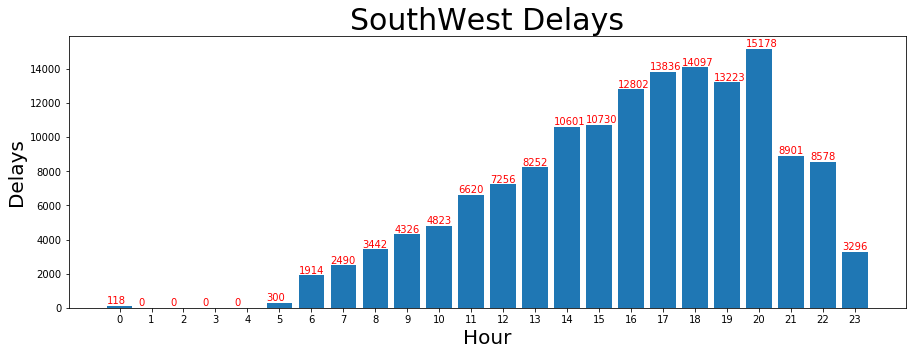

In [278]:
plt.figure(figsize=(15,5))
plt.bar(hour, sw_hour)
plt.title("SouthWest Delays", fontsize =30)
plt.xlabel("Hour", fontsize =20)
plt.xticks(range(24))
plt.ylabel("Delays", fontsize =20)
for a,b in zip(range(24), sw_hour):
    plt.text(a - .4, b + 100, str(b), fontsize =10, color ='r')
plt.show()

In [279]:
sw_month = Southwest.groupby(['MONTH']).size()

In [281]:
sw_mth = [x for x in sw_month]

In [282]:
month = ['Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

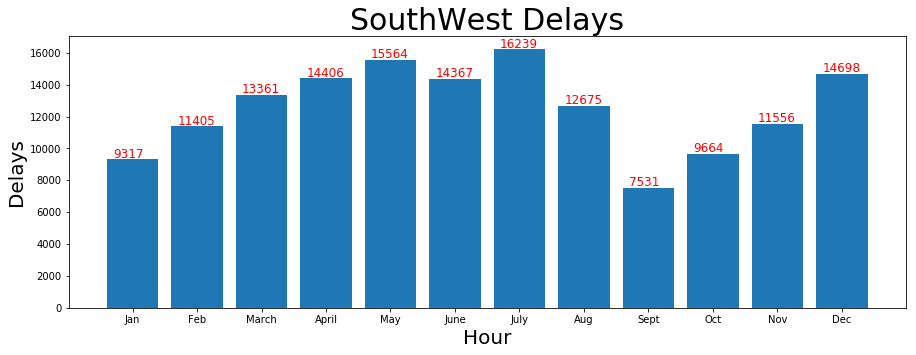

In [286]:
plt.figure(figsize=(15,5))
plt.bar(month, sw_mth)
plt.title("SouthWest Delays", fontsize =30)
plt.xlabel("Hour", fontsize =20)
plt.ylabel("Delays", fontsize =20)
for a,b in zip(range(12), sw_mth):
    plt.text(a - .3, b + 100, str(b), fontsize =12, color ='r')
plt.show()

## Weather Delay

In [288]:
weather = delay.loc[type_freq['WEATHER_DELAY'] > 0]
# 78,295 weather delays in 2018
# will put more focus on locations

In [298]:
w_month = weather['MONTH'].value_counts()

In [300]:
wthr_mth = [w_month[x] for x in range(1,13)]

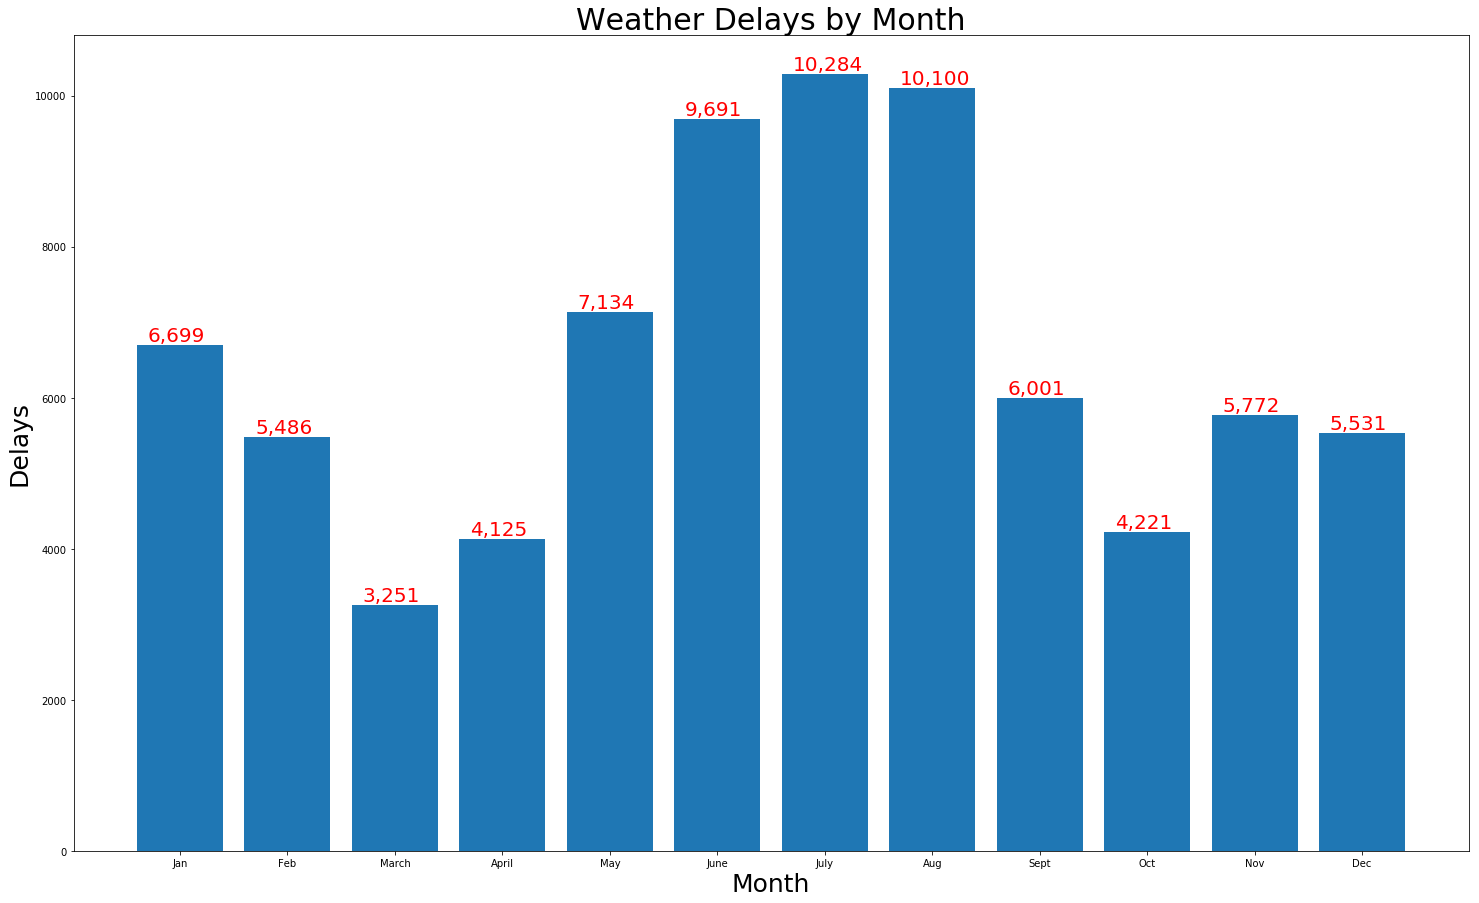

In [352]:
plt.figure(figsize=(25,15))
plt.bar(month, wthr_mth)
plt.title("Weather Delays by Month", fontsize =30)
plt.xlabel("Month", fontsize =25)
plt.ylabel("Delays", fontsize =25)
for a,b in zip(range(13), wthr_mth):
    plt.text(a - .3, b + 50, "{:,}".format(int(b)), fontsize =20, color ='r')
plt.show()

In [ ]:
# surprised to see more delays in the summer months
# best guess is rain and extrmeme heat cause more delays and snow usually leads to  a cancelled flight

In [310]:
w_hour = weather['HOUR'].value_counts()
wthr_hr = [w_hour[x] for x in range(24)]

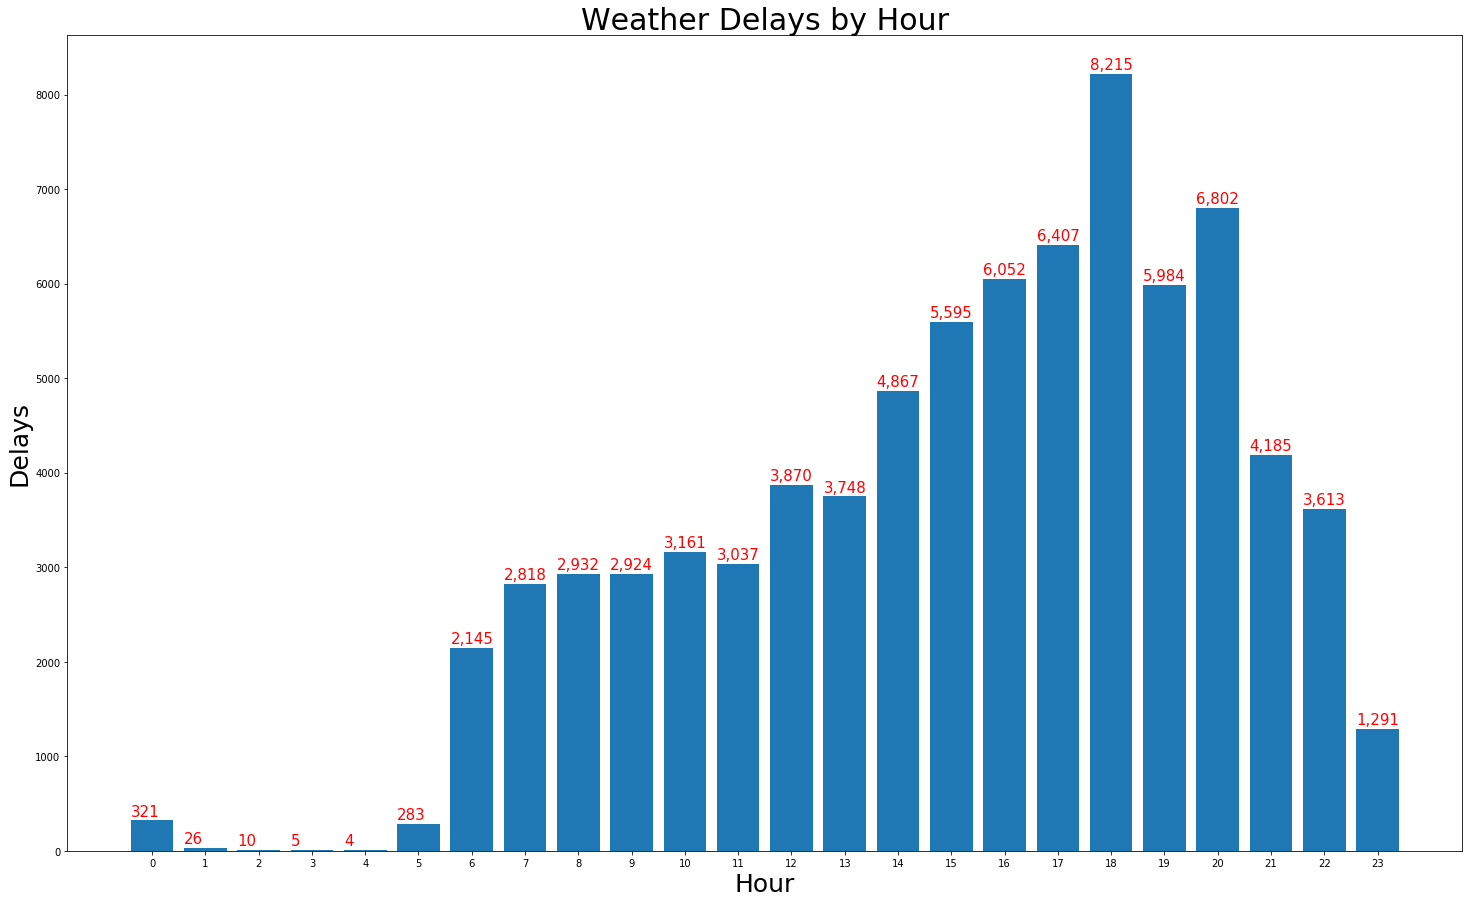

In [353]:
plt.figure(figsize=(25,15))
plt.bar(hour, wthr_hr)
plt.title("Weather Delays by Hour", fontsize =30)
plt.xlabel("Hour", fontsize =25)
plt.ylabel("Delays", fontsize =25)
plt.xticks(range(24))
for a,b in zip(range(24), wthr_hr):
    plt.text(a - .4, b + 50, "{:,}".format(int(b)), fontsize =15, color ='r')
plt.show()

In [ ]:
# hmm more weather delays in the evening, guess the weather does wait for someone

In [327]:
w_org = weather['ORIGIN_CITY_NAME'].value_counts()[:20]
wthr_org = [x for x in w_org]
org = [x for x in w_org.keys()]
org_city = [x.split(",")[0] for x in org]

In [375]:
for x in org:
    city = x.split(",")
    print(city[0])

Chicago
Atlanta
Dallas/Fort Worth
Charlotte
Houston
Orlando
New York
Miami
Washington
Denver
Minneapolis
Newark
Tampa
Detroit
Boston
Philadelphia
Fort Lauderdale
Salt Lake City
Baltimore
Nashville


In [380]:
org_city

['Chicago',
 'Atlanta',
 'Dallas/Fort Worth',
 'Charlotte',
 'Houston',
 'Orlando',
 'New York',
 'Miami',
 'Washington',
 'Denver',
 'Minneapolis',
 'Newark',
 'Tampa',
 'Detroit',
 'Boston',
 'Philadelphia',
 'Fort Lauderdale',
 'Salt Lake City',
 'Baltimore',
 'Nashville']

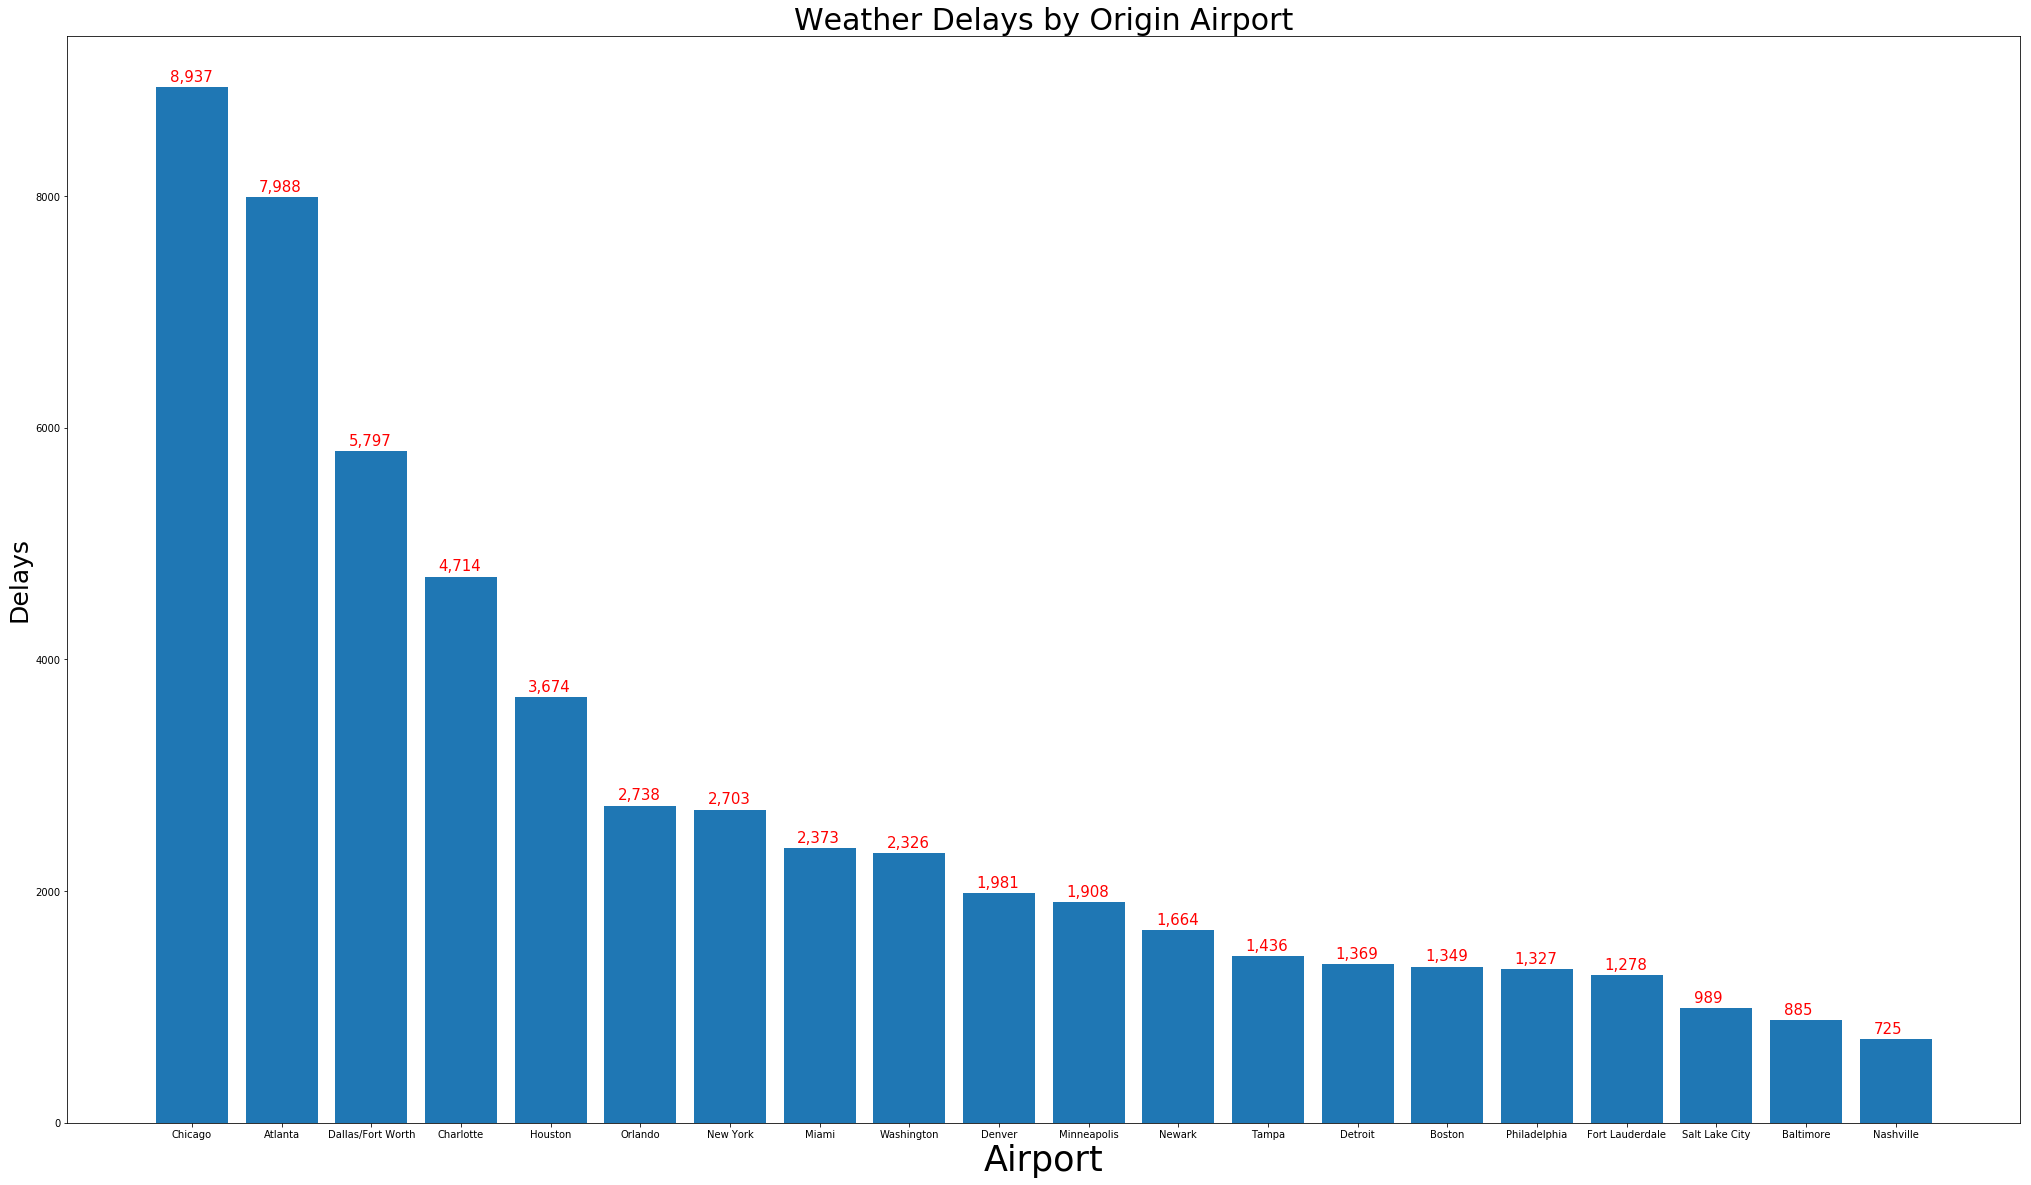

In [396]:
plt.figure(figsize=(35,20))
plt.bar(org_city, wthr_org)
plt.title("Weather Delays by Origin Airport", fontsize =30)
plt.xlabel("Airport", fontsize =35)
plt.ylabel("Delays", fontsize =25)
for a,b in zip(range(20), wthr_org):
    plt.text(a - .25, b + 50, "{:,}".format(int(b)), fontsize =15, color ='r')
plt.show()

In [386]:
w_dest = weather['DEST_CITY_NAME'].value_counts()[:20]
wthr_dest = [x for x in w_dest]
dest = [x for x in w_dest.keys()]
dest_city = [x.split(",")[0] for x in dest]

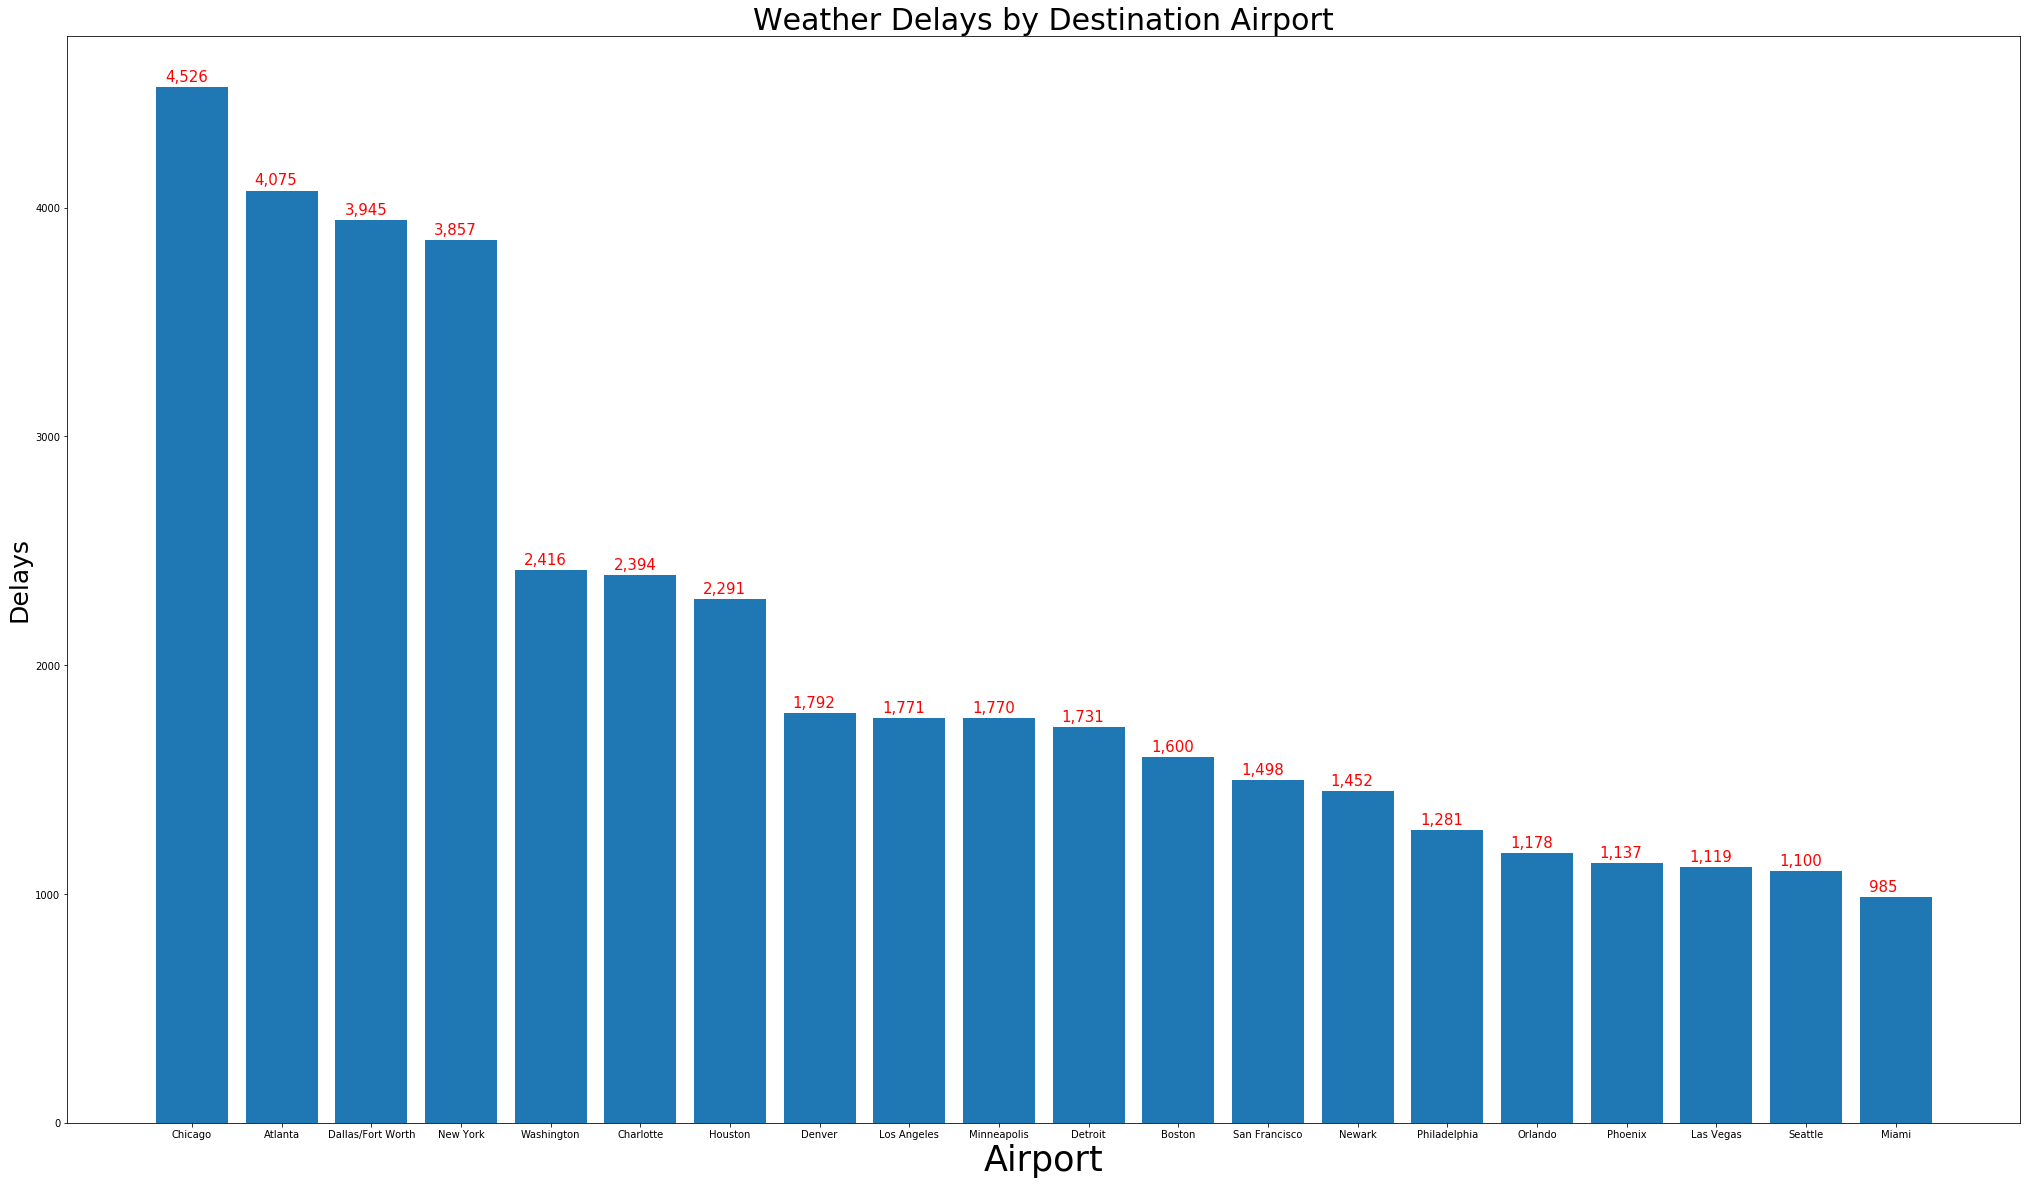

In [397]:
plt.figure(figsize=(35,20))
plt.bar(dest_city, wthr_dest)
plt.title("Weather Delays by Destination Airport", fontsize =30)
plt.xlabel("Airport", fontsize =35)
plt.ylabel("Delays", fontsize =25)
for a,b in zip(range(20), wthr_dest):
    plt.text(a - .3, b + 25, "{:,}".format(int(b)), fontsize =15, color ='r')
plt.show()